# A Prediction of Cardiac Imaging based on Machine Learning and Pain Points in Cardiology

![Image Title](images/ChuanLogo.jpg)
- **Chuan Yang**, M.D., Ph.D.
- Attending Physician of Cardiology, Shengjing Hospital of China Medical University
- A Code Crafter with Python and Machine Learning

### 支持向量机（Support Vector Machine）

- 支持向量机（SVM）是一类按监督学习（supervised learning）方式对数据进行分类的广义线性分类器，其决策边界是对学习样本求解的最大边距超平面（maximum-margin hyperplane）。


![Image Title](images/basicConcepts.jpg)

### 支持向量机（Support Vector Machine）

- SVM于1995年被提出，在二十世纪末得到快速发展并衍生出一系列改进和扩展算法，在人脸识别（face recognition）、文本分类（text categorization）和生物信息学等模式识别（pattern recognition）问题中有得到应用。

- SVM是一种十分常见的分类器，已经火爆十余年，分类能力强于NN。

### 支持向量机（Support Vector Machine）

![Image Title](images/Image_00.png)

### 支持向量机（Support Vector Machine）
![Image Title](images/Image_01.png)

### 支持向量机（Support Vector Machine）
![Image Title](images/Image_02.png)

### 支持向量机（Support Vector Machine）
![Image Title](images/Image_03.png)

### 支持向量机（Support Vector Machine）
![Image Title](images/Image_06.png)

### 支持向量（Support Vector）
![Image Title](images/Image_07.png)

### 支持向量（Support Vector）
![Image Title](images/Image_08.png)

### 建模（Modeling）
![Image Title](images/Image_13.png)

### 求解（Solutions）
![Image Title](images/Image_14.png)

### 核化支持向量机（Kernelized SVM）
![Image Title](images/Image_09.png)

### 核化支持向量机（Kernelized SVM）
![Image Title](images/Image_10.png)

### 核化支持向量机（Kernelized SVM）
![Image Title](images/Image_11.png)

### 核化支持向量机（Kernelized SVM）
![Image Title](images/Image_12.png)

### 特征空间（Feature Space）
![Image Title](images/feature_space_00.png)

### 特征空间（Feature Space）
![Image Title](images/feature_space_01.png)

![Image Title](images/eco.png)

# <center> Codes </center>
![Image Title](images/Codes.png)

## Modules

In [29]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals import joblib

import time

%matplotlib inline

## Samples
### Assignments of amounts

In [2]:
img_lao = []
img_rao = []
num_lao = 14
num_rao = 14

num_train = 11
num_test = 7

## Image Input

In [3]:
start = time.time()

for i in range(num_lao):
    if i <10:
        filename = 'CAG/p000'+str(i)+'l.bmp'
    elif i>=10 and i<100:
        filename = 'CAG/p00'+str(i)+'l.bmp'
        
    img = Image.open(filename)
    img_lao.append(img)
    
for i in range(num_rao):
    if i <10:
        filename = 'CAG/p000'+str(i)+'r.bmp'
    elif i>=10 and i<100:
        filename = 'CAG/p00'+str(i)+'r.bmp'
    img = Image.open(filename)
    img_rao.append(img)
    
end = time.time()
print(end - start)

0.012965679168701172


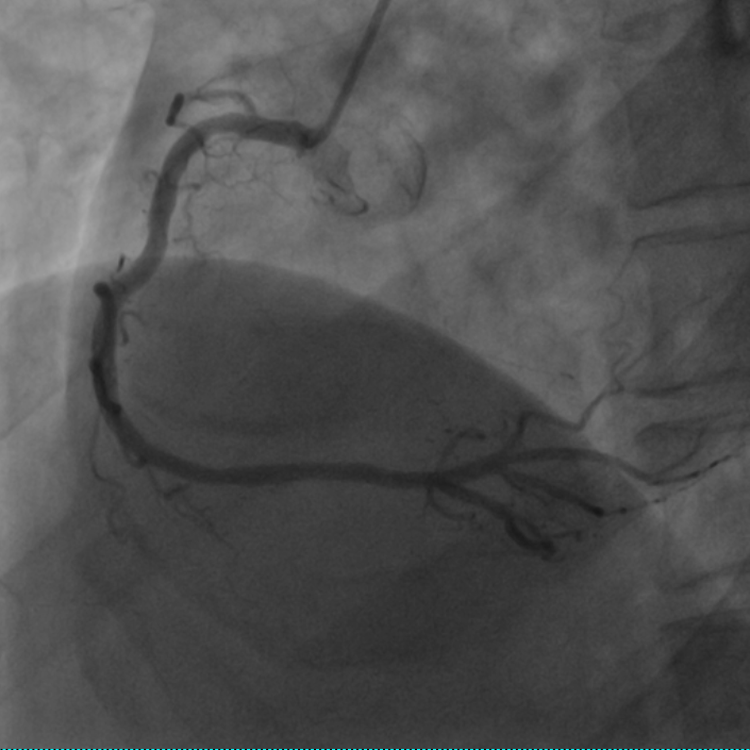

In [4]:
img_rao[9]

## Functions

In [5]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [6]:
def limitedEqualize(image, limit=4.0):
    
    image_limited_equalized_list = []
    
    clahe = cv2.createCLAHE(clipLimit=limit, tileGridSize=(8,8))  #CLAHE (Contrast Limited Adaptive Histogram Equalization)
    image_limited_equalized_list = clahe.apply(image)

    image_limited_equalized = np.array(image_limited_equalized_list, dtype=np.uint8)
    return image_limited_equalized

In [7]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

## Data Extraction from Images

In [8]:
start = time.time()

data_rao = []
data_lao = []
rgb_data_rao = []
rgb_data_lao = []

for case_rao in img_rao:
    grey, rgb = extractData(case_rao)
    data_rao.append(grey)
    rgb_data_rao.append(rgb)
    
for case_lao in img_lao:
    grey, rgb = extractData(case_lao)
    data_lao.append(grey)
    rgb_data_lao.append(rgb)  
    
end = time.time()
print(end - start)

30.923340559005737


### List to Numpy Matrix

In [9]:
imageMatrix = np.array(rgb_data_rao[0])

### * bug existed

In [10]:
# img_limited_equalized = limitedEqualize(imageMatrix, 4.0)

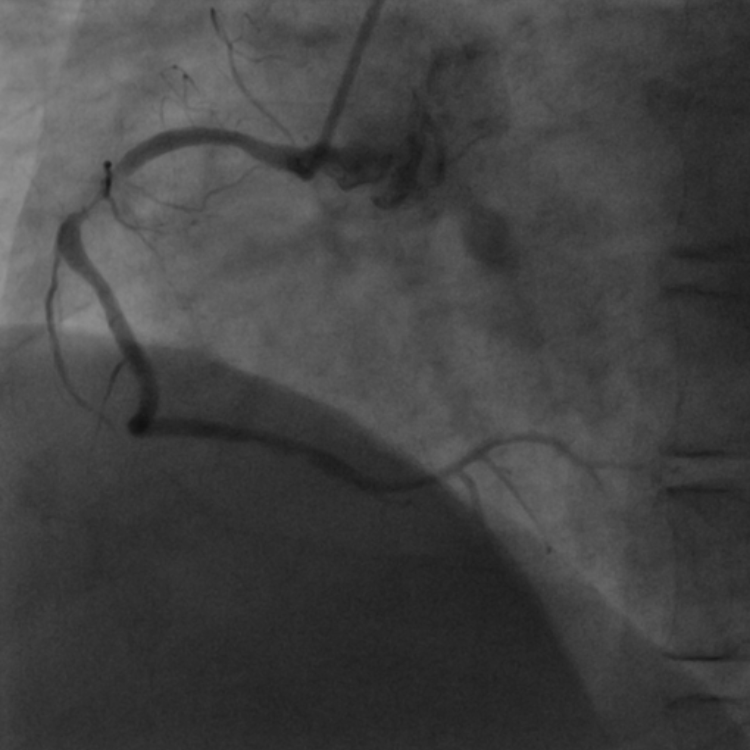

In [11]:
img = imageReconstruct(imageMatrix)
img

## Flat Transformation from 2D to 1D

In [12]:
data_rao_flat = []
data_lao_flat = []

for case_rao in data_rao:  
    case_flat = []
    for row in case_rao:
        for column in row:
            case_flat.append(column)            
    data_rao_flat.append(case_flat)
    
for case_lao in data_lao:   
    case_flat = []
    for row in case_lao:
        for column in row:
            case_flat.append(column)
    data_lao_flat.append(case_flat)

## Support Vector Classification

In [13]:
c = [1] * num_train + [2] * num_train

c

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

### Training

In [14]:
start = time.time()

X_train = np.array(data_lao_flat[:num_train] + data_rao_flat[:num_train])
y_train = np.array(c)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
    
end = time.time()
print(end - start)

1.175849437713623


### Prediction

In [15]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[4.31577373e-07 4.35261915e-07 4.45077708e-07 ... 1.69320491e-07
  1.71254638e-07 1.74935848e-07]]
b =  [0.99246901]
Indices of support vectors =  [ 3  5  7  8  9 12 13 14]
Support vectors =  [[ 87.  86.  86. ... 114. 113. 113.]
 [ 80.  82.  82. ... 102. 101.  98.]
 [ 44.  42.  41. ... 127. 127. 127.]
 ...
 [124. 124. 128. ...  60.  60.  60.]
 [107. 107. 107. ...  48.  45.  42.]
 [145. 145. 145. ... 192. 192. 192.]]
Number of support vectors for each class =  [5 3]
Coefficients of the support vector in the decision function =  [[1.43646500e-09 1.59176390e-09 2.70631341e-09 1.64938067e-10
  1.83916209e-10 1.63943275e-09 4.74652693e-10 3.96931114e-09]]


In [16]:
clf.predict(data_lao_flat[-num_test:] + data_rao_flat[-num_test:])

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])

## Performance Measures

In [17]:
y_predict = clf.predict(data_lao_flat[-num_test:] + data_rao_flat[-num_test:])

In [18]:
y_test = [1] * num_test + [2] * num_test

In [19]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])

### Confusion Matrix (混淆矩阵)

In [20]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,2]))
confusion = pd.DataFrame(cm, index=['LCA', 'RCA'],
                        columns=['Predictive LCA,', 'Predictive RCA'])
confusion

,"Predictive LCA,",Predictive RCA
LCA,7,0
RCA,0,7


In [21]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



## Save the Model

In [22]:
c = joblib.dump(clf, 'trained_model.m')
print(c)

['trained_model.m']


## Load the Model

In [23]:
d = joblib.load('trained_model.m')
print(d)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [24]:
img_weird = []
filenames = ['CAG/p0088l.bmp', 'CAG/p0088r.bmp', 'CAG/p0066l.bmp']
for filename in filenames:
    img = Image.open(filename)
    img_weird.append(img)
    
data_weird = []
rgb_data_weird = []
for case_weird in img_weird:
    grey, rgb = extractData(case_weird)
    data_weird.append(grey)
    rgb_data_weird.append(rgb)
    
data_weird_flat = []
for case_weird in data_weird:  
    case_flat = []
    for row in case_weird:
        for column in row:
            case_flat.append(column)            
    data_weird_flat.append(case_flat)

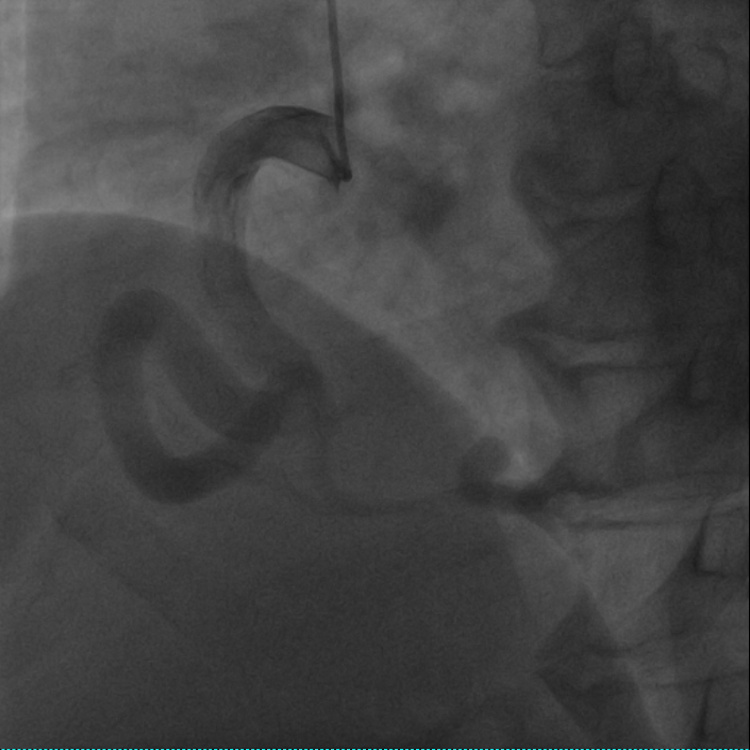

In [25]:
img = imageReconstruct(np.array(rgb_data_weird[1]))
img

In [26]:
start = time.time()

print(d.predict(data_weird_flat))

end = time.time()
print(end - start)

[1 2 1]
0.10971856117248535


In [27]:
d.predict(data_weird_flat)

array([1, 2, 1])

# Thank you!

![Image Title](images/ChuanLogo.jpg)